In [1]:
import pandas as pd
import psutil
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('synthetic_metrics.csv')
df.describe()

,cpu,ram,disk,network
count,1440.000000,1440.000000,1440.000000,1.440000e+03
mean,20.484694,40.436493,103713.524896,2.083372e+05
std,8.117867,10.936464,45568.156558,1.002567e+05
min,4.290000,8.070000,38584.400000,4.216266e+04
25%,16.445000,33.385000,87072.902500,1.684279e+05
50%,19.955000,40.280000,100321.705000,2.015913e+05
75%,23.450000,47.090000,113650.395000,2.347447e+05
max,99.830000,99.530000,681443.310000,1.481568e+06


We calc Z-Score normalisation on each ram and cpu row.

In [3]:
cpu_mean=df['cpu'].mean()
cpu_std=df['cpu'].std()
ram_mean=df['ram'].mean()
ram_std=df['ram'].std()
for index,row in df.iterrows():
    df['zscore_cpu'] = (df['cpu'] - df['cpu'].mean()) / df['cpu'].std()
    df['zscore_ram'] = (df['ram'] - df['ram'].mean()) / df['ram'].std()

In [4]:
df.head()

,timestamp,cpu,ram,disk,network,zscore_cpu,zscore_ram
0,2025-05-09 00:00:00,22.95,26.08,122393.01,135523.15,0.303689,-1.312718
1,2025-05-09 00:01:00,14.79,22.15,90181.34,214086.74,-0.701501,-1.672066
2,2025-05-09 00:02:00,24.64,44.67,114729.46,220857.67,0.511872,0.387100
3,2025-05-09 00:03:00,26.99,26.84,80885.10,137918.05,0.801357,-1.243226
4,2025-05-09 00:04:00,13.82,44.87,109340.72,219225.05,-0.820991,0.405388


Now we’ll identify the data points that have a Z-score greater than 3 or less than -3, which are commonly considered outliers.\

In [5]:
cpu_outliers = df[abs(df['zscore_cpu']) > 3]
ram_outliers = df[abs(df['zscore_ram']) > 3]

print(f"Total number of data points: {len(df)}")
print(f"Number of CPU outliers: {len(cpu_outliers)}")
print(f"Number of RAM outliers: {len(ram_outliers)}")

# Display the CPU outliers
print("\nCPU Outliers:")
if len(cpu_outliers) > 0:
    print(cpu_outliers[['timestamp', 'cpu', 'zscore_cpu']].sort_values(by='zscore_cpu', ascending=False))
else:
    print("No CPU outliers found.")

# Display the RAM outliers
print("\nRAM Outliers:")
if len(ram_outliers) > 0:
    print(ram_outliers[['timestamp', 'ram', 'zscore_ram']].sort_values(by='zscore_ram', ascending=False))
else:
    print("No RAM outliers found.")

# Create a combined outliers dataframe
all_outliers = pd.concat([cpu_outliers, ram_outliers]).drop_duplicates()
print(f"\nTotal unique timestamp outliers: {len(all_outliers)}")

Total number of data points: 1440
Number of CPU outliers: 10
Number of RAM outliers: 10

CPU Outliers:
                timestamp    cpu  zscore_cpu
772   2025-05-09 12:52:00  99.83    9.774157
226   2025-05-09 03:46:00  99.34    9.713796
439   2025-05-09 07:19:00  99.07    9.680536
220   2025-05-09 03:40:00  98.88    9.657131
553   2025-05-09 09:13:00  96.58    9.373805
799   2025-05-09 13:19:00  96.19    9.325763
1224  2025-05-09 20:24:00  92.03    8.813313
766   2025-05-09 12:46:00  91.41    8.736939
618   2025-05-09 10:18:00  90.38    8.610058
562   2025-05-09 09:22:00  90.30    8.600203

RAM Outliers:
                timestamp    ram  zscore_ram
498   2025-05-09 08:18:00  99.53    5.403347
965   2025-05-09 16:05:00  97.50    5.217729
148   2025-05-09 02:28:00  96.27    5.105261
988   2025-05-09 16:28:00  94.90    4.979992
1396  2025-05-09 23:16:00  94.10    4.906843
779   2025-05-09 12:59:00  92.28    4.740427
932   2025-05-09 15:32:00  92.02    4.716653
1006  2025-05-09 16:46:00  

Visualize the data with outliers highlighted

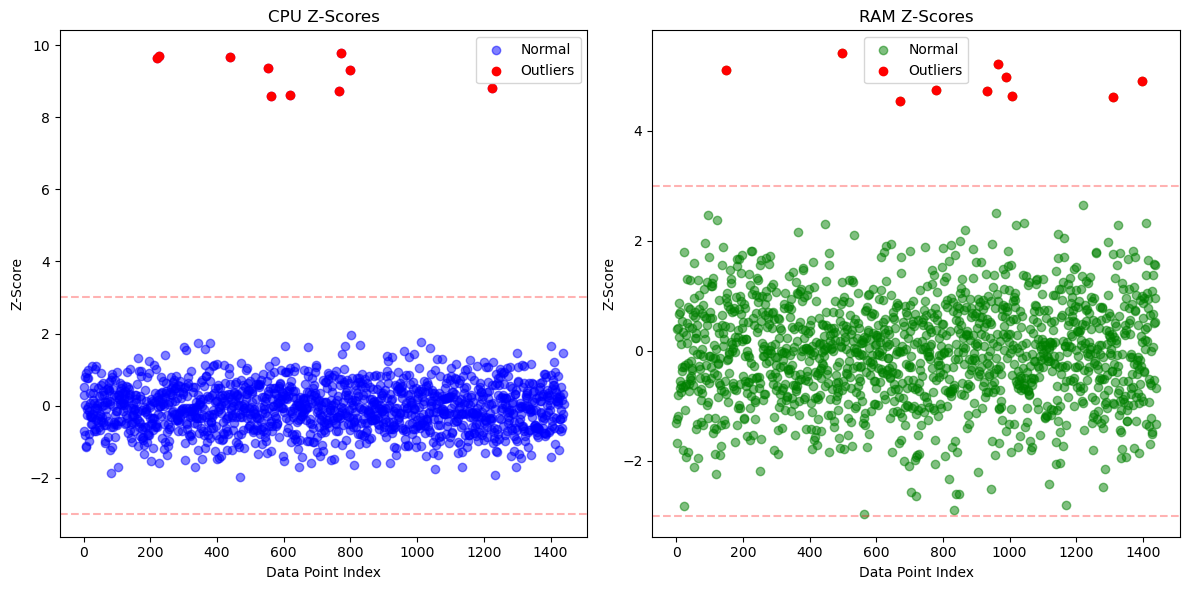

In [6]:
# Visualize the data with outliers highlighted
plt.figure(figsize=(12, 6))

# CPU subplot
plt.subplot(1, 2, 1)
plt.scatter(df.index, df['zscore_cpu'], alpha=0.5, label='Normal', color='blue')
if len(cpu_outliers) > 0:
    plt.scatter(cpu_outliers.index, cpu_outliers['zscore_cpu'], color='red', label='Outliers')
plt.axhline(y=3, color='r', linestyle='--', alpha=0.3)
plt.axhline(y=-3, color='r', linestyle='--', alpha=0.3)
plt.title('CPU Z-Scores')
plt.xlabel('Data Point Index')
plt.ylabel('Z-Score')
plt.legend()

# RAM subplot
plt.subplot(1, 2, 2)
plt.scatter(df.index, df['zscore_ram'], alpha=0.5, label='Normal', color='green')
if len(ram_outliers) > 0:
    plt.scatter(ram_outliers.index, ram_outliers['zscore_ram'], color='red', label='Outliers')
plt.axhline(y=3, color='r', linestyle='--', alpha=0.3)
plt.axhline(y=-3, color='r', linestyle='--', alpha=0.3)
plt.title('RAM Z-Scores')
plt.xlabel('Data Point Index')
plt.ylabel('Z-Score')
plt.legend()

plt.tight_layout()
plt.show()